In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
import xesmf as xe
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import gridspec
import cartopy.mpl.ticker as cticker
import scipy
import scipy.stats
import gsw

from defs import mmm, smm

In [2]:
folder = 'Data_processed/'
modelliste400 =  ['CCSM4-UoT', 'CESM2', 'IPSL-CM5A2', 'MIROC4m', 'COSMOS', 'HadCM3', 'NorESM1-F']
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']

## Open and process fields

In [3]:
dsgrid = xr.open_dataset(folder+'1x1grid.nc')
area = dsgrid.area
lat = dsgrid.lat
lon = dsgrid.lon

def sia(sic):
    sif = sic/100
    sia = (sif.where(lat<0)*area).sum()
    return sia

In [4]:
#Sea surface salinity
dsmmmE280 = xr.open_dataset(folder+'MMM_ensemble/E280/so_1x1_100yr.nc')
dsmmmEoi400 = xr.open_dataset(folder+'MMM_ensemble/Eoi400/so_1x1_100yr.nc')

dssmmE280 = xr.open_dataset(folder+'SMM_ensemble/E280/so_1x1_100yr.nc')
dssmmEoi400 = xr.open_dataset(folder+'SMM_ensemble/Eoi400/so_1x1_100yr.nc')

mmmsssE280 = mmm(dsmmmE280.so[:,0])
mmmsssEoi400 = mmm(dsmmmEoi400.so[:,0])

smmsssE280 = smm(dssmmE280.so[:,0])
smmsssEoi400 = smm(dssmmEoi400.so[:,0])

In [5]:
#Sea surface temperature
dsmmmE280 = xr.open_dataset(folder+'MMM_ensemble/E280/thetao_1x1_100yr.nc')
dsmmmEoi400 = xr.open_dataset(folder+'MMM_ensemble/Eoi400/thetao_1x1_100yr.nc')

dssmmE280 = xr.open_dataset(folder+'SMM_ensemble/E280/thetao_1x1_100yr.nc')
dssmmEoi400 = xr.open_dataset(folder+'SMM_ensemble/Eoi400/thetao_1x1_100yr.nc')

mmmsstE280 = mmm(dsmmmE280.thetao[:,0])
mmmsstEoi400 = mmm(dsmmmEoi400.thetao[:,0])

smmsstE280 = smm(dssmmE280.thetao[:,0])
smmsstEoi400 = smm(dssmmEoi400.thetao[:,0])

In [6]:
#Precipitation
dsmmmE280 = xr.open_dataset(folder+'MMM_ensemble/E280/pr_100yr.nc')
dsmmmEoi400 = xr.open_dataset(folder+'MMM_ensemble/Eoi400/pr_100yr.nc')

dssmmE280 = xr.open_dataset(folder+'SMM_ensemble/E280/pr_100yr.nc')
dssmmEoi400 = xr.open_dataset(folder+'SMM_ensemble/Eoi400/pr_100yr.nc')

mmmprE280 = mmm(dsmmmE280.pr)
mmmprEoi400 = mmm(dsmmmEoi400.pr)

smmprE280 = smm(dssmmE280.pr)
smmprEoi400 = smm(dssmmEoi400.pr)

In [7]:
#Sea ice concentration
dsmmmE280 = xr.open_dataset(folder+'MMM_ensemble/E280/SI_100yr.nc')
dsmmmEoi400 = xr.open_dataset(folder+'MMM_ensemble/Eoi400/SI_100yr.nc')

dssmmE280 = xr.open_dataset(folder+'SMM_ensemble/E280/SI_100yr.nc')
dssmmEoi400 = xr.open_dataset(folder+'SMM_ensemble/Eoi400/SI_100yr.nc')

mmmsiE280 = mmm(dsmmmE280.si_mean)
mmmsiEoi400 = mmm(dsmmmEoi400.si_mean)

smmsiE280 = smm(dssmmE280.si_mean)
smmsiEoi400 = smm(dssmmEoi400.si_mean)


/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62407/242215234.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = plt.cm.get_cmap("cmo.balance",8).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62407/242215234.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = plt.cm.get_cmap("PuOr",6).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62407/242215234.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap3 = pl

Text(-100, -80, '$\\Delta SSS_{SO} =$ 0.05psu')

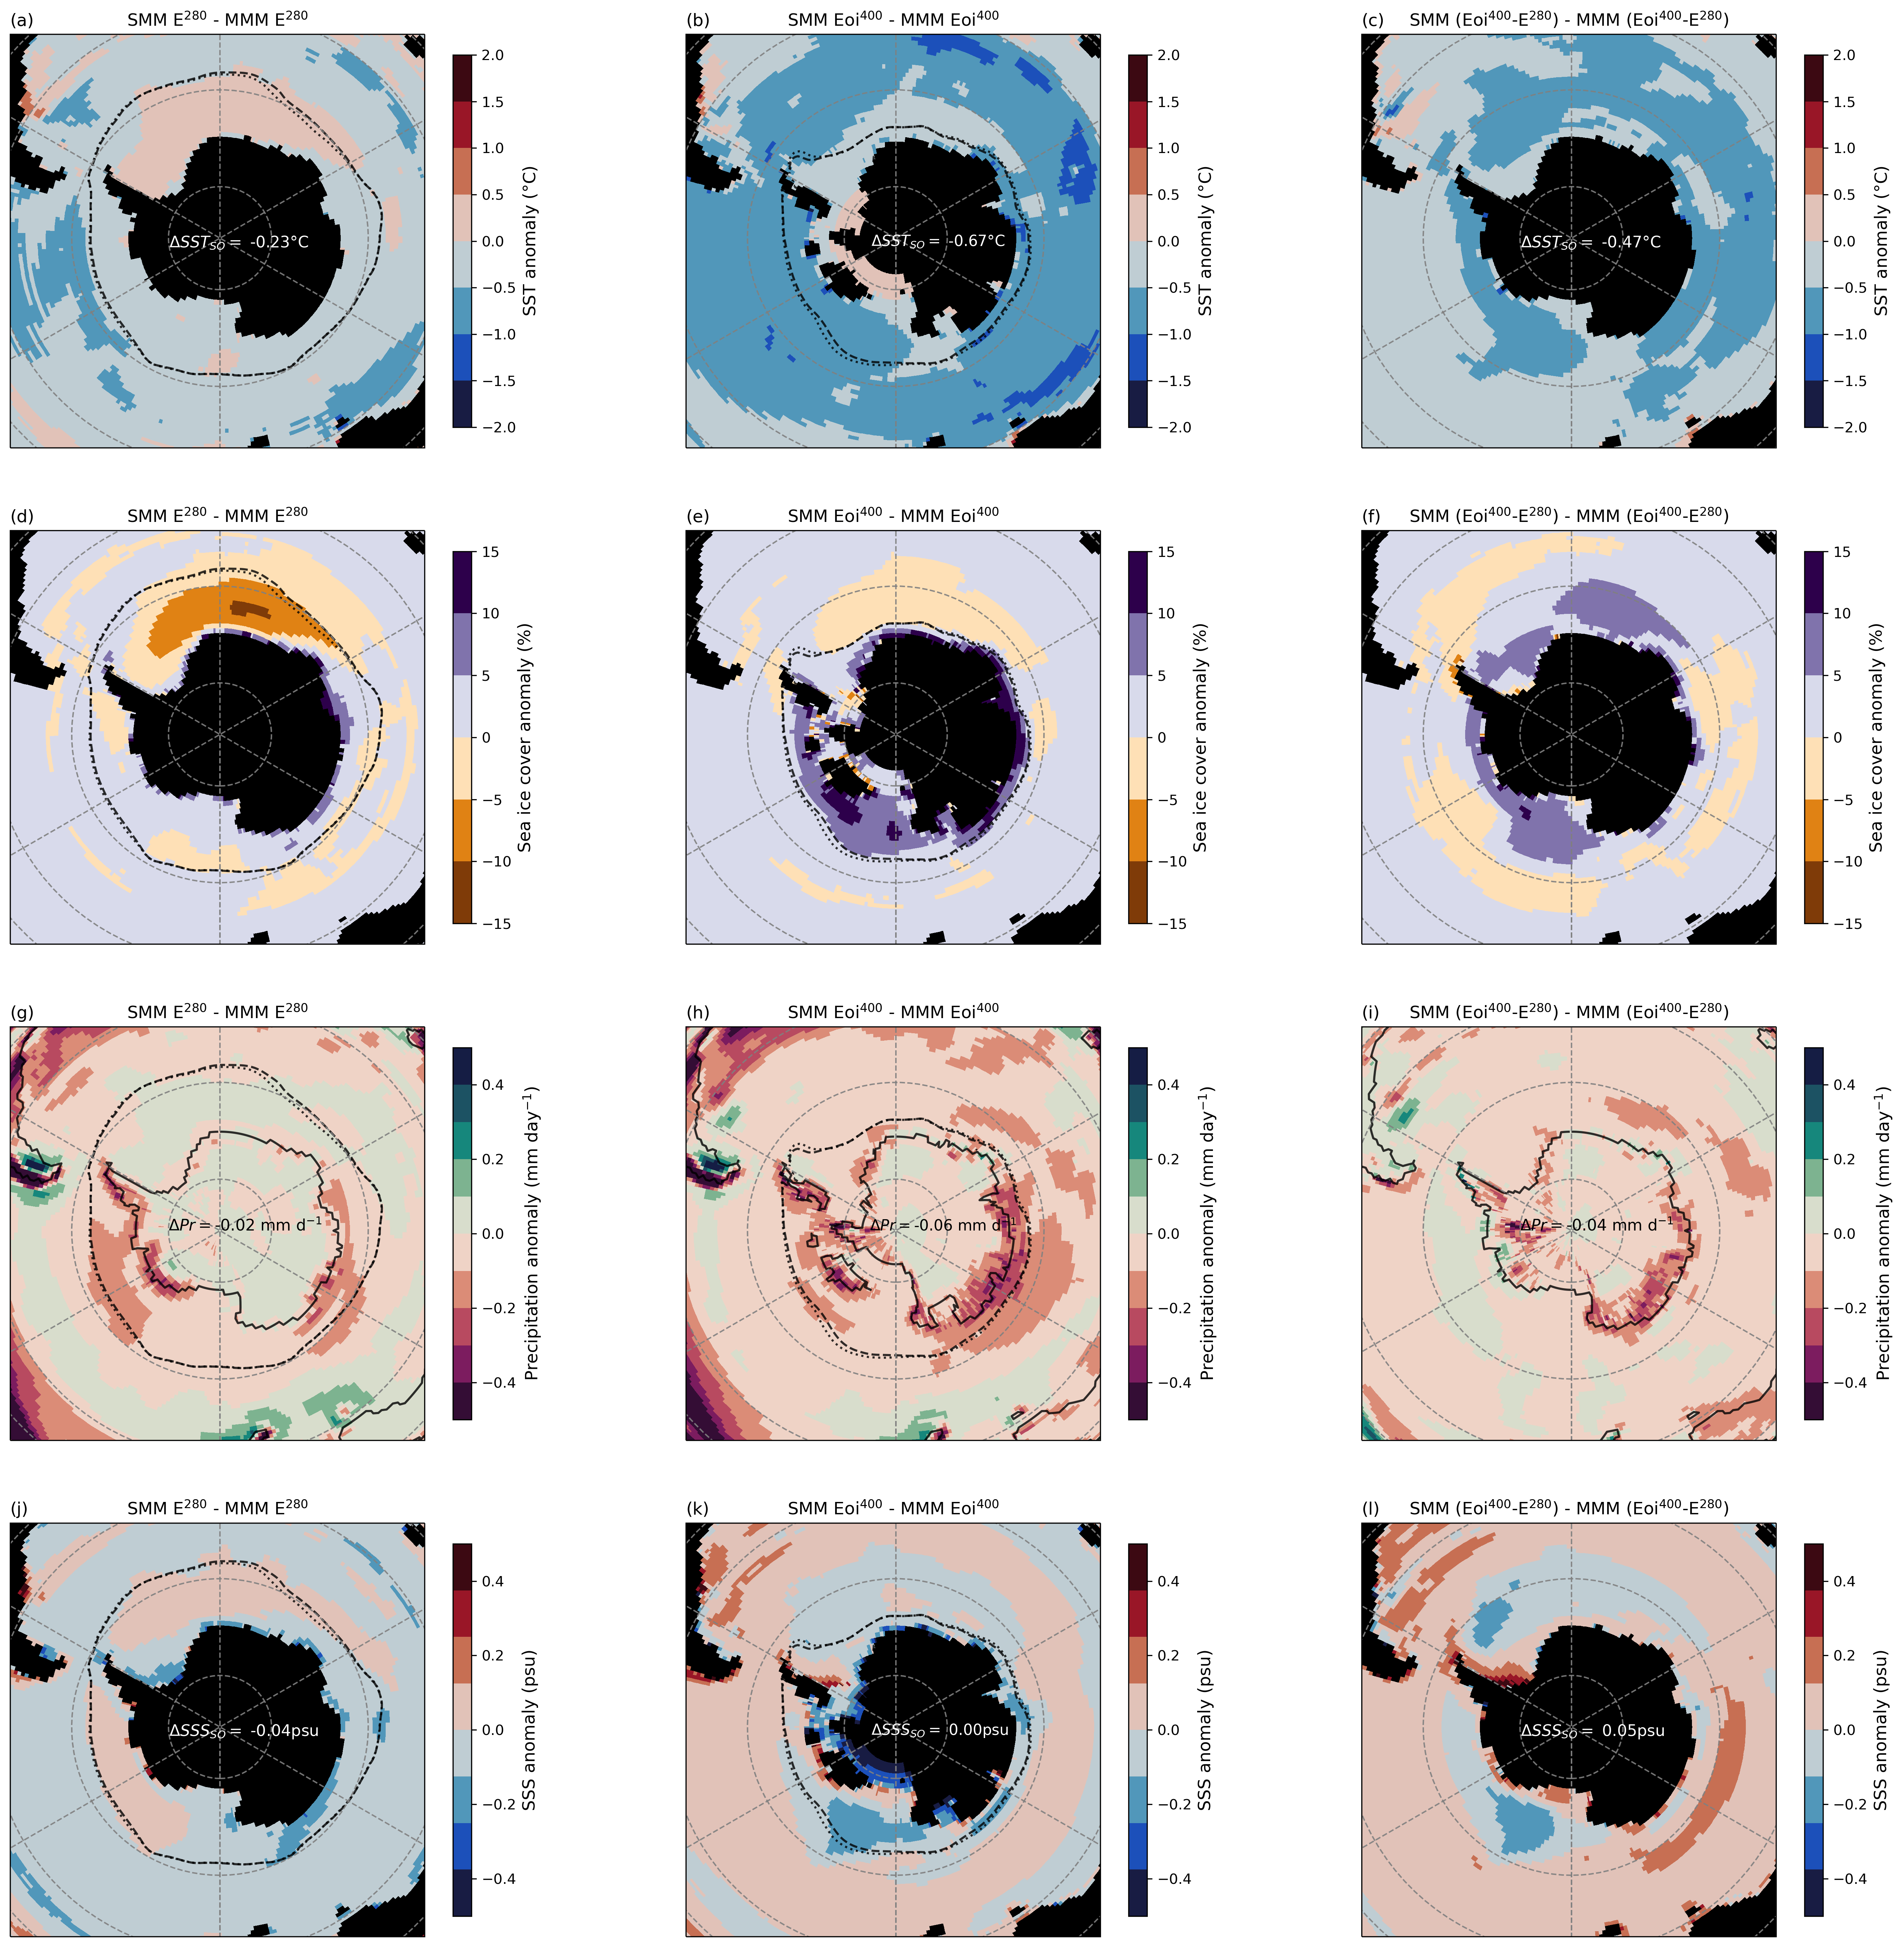

In [8]:
fig = plt.figure(figsize=(24,24),dpi=300)
proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0)

cmap1 = plt.cm.get_cmap("cmo.balance",8).copy()
cmap1.set_bad('black')

cmap2 = plt.cm.get_cmap("PuOr",6).copy()
cmap2.set_bad('black')

cmap3 = plt.cm.get_cmap("cmo.curl_r",10).copy()
cmap3.set_bad('black')

iceline = 15

ax = fig.add_subplot(431, projection=proj)
im=ax.pcolormesh(lon,lat,smmsstE280-mmmsstE280, transform=ccrs.PlateCarree(), cmap=cmap1, vmin = -2, vmax = 2)
ax.contour(lon,lat, mmmsiE280, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat, smmsiE280, colors=['k','k'], linestyles = ['dotted'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SST anomaly ($\degree$C)', fontsize=12)
ax.set_title(r'SMM E$^{280}$ - MMM E$^{280}$', loc='center')
ax.set_title(r'(a)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
#ax.text(-80,-80,'$\Delta SST_{glob} =$ %.2f$\degree$C' %((smmsstE280-mmmsstE280).weighted(area).mean().values), fontsize=11, transform=ccrs.PlateCarree(), color='white')
ax.text(-100,-80,'$\Delta SST_{SO} =$ %.2f$\degree$C' %((smmsstE280-mmmsstE280).where(lat<=-45).weighted(area).mean().values), fontsize=11, transform=ccrs.PlateCarree(), color='white')

ax = fig.add_subplot(432, projection=proj)
im=ax.pcolormesh(lon,lat,smmsstEoi400-mmmsstEoi400, transform=ccrs.PlateCarree(), cmap=cmap1, vmin = -2, vmax = 2)
ax.contour(lon,lat, mmmsiEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat, smmsiEoi400, colors=['k','k'], linestyles = ['dotted'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SST anomaly ($\degree$C)', fontsize=12)
ax.set_title(r'SMM Eoi$^{400}$ - MMM Eoi$^{400}$', loc='center')
ax.set_title(r'(b)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
#ax.text(-72,-85,'$\Delta SST_{glob} =$ %.2f$\degree$C' %((smmsstEoi400-mmmsstEoi400).weighted(area).mean().values), fontsize=10.5, transform=ccrs.PlateCarree(), color='white')
ax.text(-108,-85,'$\Delta SST_{SO} =$ %.2f$\degree$C' %((smmsstEoi400-mmmsstEoi400).where(lat<=-45).weighted(area).mean().values), fontsize=10.5, transform=ccrs.PlateCarree(), color='white')

ax = fig.add_subplot(433, projection=proj)
im=ax.pcolormesh(lon,lat,(smmsstEoi400-mmmsstEoi400)-(smmsstE280-mmmsstE280), transform=ccrs.PlateCarree(), cmap=cmap1, vmin = -2, vmax = 2)
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SST anomaly ($\degree$C)', fontsize=12)
ax.set_title(r'SMM (Eoi$^{400}$-E$^{280}$) - MMM (Eoi$^{400}$-E$^{280}$)', loc='center')
ax.set_title(r'(c)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
#ax.text(-80,-80,'$\Delta SST_{glob} =$ %.2f$\degree$C' %(((smmsstEoi400-mmmsstEoi400)-(smmsstE280-mmmsstE280)).weighted(area).mean().values), fontsize=11, transform=ccrs.PlateCarree(), color='white')
ax.text(-100,-80,'$\Delta SST_{SO} =$ %.2f$\degree$C' %(((smmsstEoi400-mmmsstEoi400)-(smmsstE280-mmmsstE280)).where(lat<=-45).weighted(area).mean().values), fontsize=11, transform=ccrs.PlateCarree(), color='white')

ax = fig.add_subplot(434, projection=proj)
im=ax.pcolormesh(lon,lat,smmsiE280-mmmsiE280, transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -15, vmax = 15)
ax.contour(lon,lat, mmmsiE280, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat, smmsiE280, colors=['k','k'], linestyles = ['dotted'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Sea ice cover anomaly (%)', fontsize=12)
ax.set_title(r'SMM E$^{280}$ - MMM E$^{280}$', loc='center')
ax.set_title(r'(d)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
sianom = (sia(smmsiE280)-sia(mmmsiE280)).values
siammm = sia(mmmsiE280).values
#ax.text(-90,-80,'$\Delta SIA_{SO} =$ %.1f%%' %(sianom/siammm*100), fontsize=11, transform=ccrs.PlateCarree(), color='white')

ax = fig.add_subplot(435, projection=proj)
im=ax.pcolormesh(lon,lat,smmsiEoi400-mmmsiEoi400, transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -15, vmax = 15)
ax.contour(lon,lat, mmmsiEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat, smmsiEoi400, colors=['k','k'], linestyles = ['dotted'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Sea ice cover anomaly (%)', fontsize=12)
ax.set_title(r'SMM Eoi$^{400}$ - MMM Eoi$^{400}$', loc='center')
ax.set_title(r'(e)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax = fig.add_subplot(436, projection=proj)
im=ax.pcolormesh(lon,lat,(smmsiEoi400-mmmsiEoi400)-(smmsiE280-mmmsiE280), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -15, vmax = 15)
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Sea ice cover anomaly (%)', fontsize=12)
ax.set_title(r'SMM (Eoi$^{400}$-E$^{280}$) - MMM (Eoi$^{400}$-E$^{280}$)', loc='center')
ax.set_title(r'(f)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax = fig.add_subplot(437, projection=proj)
im=ax.pcolormesh(lon,lat,smmprE280-mmmprE280, transform=ccrs.PlateCarree(), cmap=cmap3, vmin = -0.5, vmax = 0.5)
ax.contour(lon,lat, mmmsiE280, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat, smmsiE280, colors=['k','k'], linestyles = ['dotted'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat,mmmsiE280.where(mmmsiE280>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precipitation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title(r'SMM E$^{280}$ - MMM E$^{280}$', loc='center')
ax.set_title(r'(g)', loc='left')
pranom = (smmprE280-mmmprE280).where(lat<=-45).weighted(area).mean().values
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
ax.text(-90,-80,'$\Delta Pr =$%.2f mm d$^{-1}$' %pranom, fontsize=11, transform=ccrs.PlateCarree(), color='black')

ax = fig.add_subplot(438, projection=proj)
im=ax.pcolormesh(lon,lat,smmprEoi400-mmmprEoi400, transform=ccrs.PlateCarree(), cmap=cmap3, vmin = -0.5, vmax = 0.5)
ax.contour(lon,lat, mmmsiEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat, smmsiEoi400, colors=['k','k'], linestyles = ['dotted'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat,mmmsiEoi400.where(mmmsiEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precipitation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title(r'SMM Eoi$^{400}$ - MMM Eoi$^{400}$', loc='center')
ax.set_title(r'(h)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
pranom = (smmprEoi400-mmmprEoi400).where(lat<=-45).weighted(area).mean().values
ax.text(-90,-85,'$\Delta Pr =$%.2f mm d$^{-1}$' %(pranom), fontsize=10.5, transform=ccrs.PlateCarree(), color='black')

ax = fig.add_subplot(439, projection=proj)
im=ax.pcolormesh(lon,lat,(smmprEoi400-mmmprEoi400)-(smmprE280-mmmprE280), transform=ccrs.PlateCarree(), cmap=cmap3, vmin = -0.5, vmax = 0.5)
ax.contour(lon,lat,mmmsiEoi400.where(mmmsiE280>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precipitation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title(r'SMM (Eoi$^{400}$-E$^{280}$) - MMM (Eoi$^{400}$-E$^{280}$)', loc='center')
ax.set_title(r'(i)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
pranom = ((smmprEoi400-mmmprEoi400)-(smmprE280-mmmprE280)).where(lat<=-45).weighted(area).mean().values
ax.text(-90,-80,'$\Delta Pr =$%.2f mm d$^{-1}$' %pranom, fontsize=11, transform=ccrs.PlateCarree(), color='black')

ax = fig.add_subplot(4,3,10, projection=proj)
im=ax.pcolormesh(lon,lat,smmsssE280-mmmsssE280, transform=ccrs.PlateCarree(), cmap=cmap1, vmin = -0.5, vmax = 0.5)
ax.contour(lon,lat, mmmsiE280, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat, smmsiE280, colors=['k','k'], linestyles = ['dotted'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SSS anomaly (psu)', fontsize=12)
ax.set_title(r'SMM E$^{280}$ - MMM E$^{280}$', loc='center')
ax.set_title(r'(j)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
ax.text(-100,-80,'$\Delta SSS_{SO} =$ %.2fpsu' %((smmsssE280-mmmsssE280).where(lat<=-45).weighted(area).mean().values), fontsize=11, transform=ccrs.PlateCarree(), color='white')

ax = fig.add_subplot(4,3,11, projection=proj)
im=ax.pcolormesh(lon,lat,smmsssEoi400-mmmsssEoi400, transform=ccrs.PlateCarree(), cmap=cmap1, vmin = -0.5, vmax = 0.5)
ax.contour(lon,lat, mmmsiEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(lon,lat, smmsiEoi400, colors=['k','k'], linestyles = ['dotted'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SSS anomaly (psu)', fontsize=12)
ax.set_title(r'SMM Eoi$^{400}$ - MMM Eoi$^{400}$', loc='center')
ax.set_title(r'(k)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
ax.text(-108,-85,'$\Delta SSS_{SO} =$ %.2fpsu' %((smmsssEoi400-mmmsssEoi400).where(lat<=-45).weighted(area).mean().values), fontsize=10.5, transform=ccrs.PlateCarree(), color='white')

ax = fig.add_subplot(4,3,12, projection=proj)
im=ax.pcolormesh(lon,lat,(smmsssEoi400-mmmsssEoi400)-(smmsssE280-mmmsssE280), transform=ccrs.PlateCarree(), cmap=cmap1, vmin = -0.5, vmax = 0.5)
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SSS anomaly (psu)', fontsize=12)
ax.set_title(r'SMM (Eoi$^{400}$-E$^{280}$) - MMM (Eoi$^{400}$-E$^{280}$)', loc='center')
ax.set_title(r'(l)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')
ax.text(-100,-80,'$\Delta SSS_{SO} =$ %.2fpsu' %(((smmsssEoi400-mmmsssEoi400)-(smmsssE280-mmmsssE280)).where(lat<=-45).weighted(area).mean().values), fontsize=11, transform=ccrs.PlateCarree(), color='white')

#plt.savefig('SFig1.png', bbox_inches='tight')